In [4]:
!pip3 install quandl

In [24]:
%matplotlib inline
import quandl as q
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [25]:
q.ApiConfig.api_key = 'rjflkfldkjgljgdlgkjldflfgjsdlfgkjsdlgj'

In [41]:
stock_list = ['AAPL','AMZN', 'MSFT', 'GOOG']
start = datetime(2017, 3, 31)
end = datetime.now()

In [42]:
file = q.get_table('WIKI/PRICES', ticker = stock_list, 
                        #qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, ## select the columns you might want or select all 
                        date = { 'gte': start, 'lte': end }, paginate=True).set_index("date")

In [43]:
file.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-03-27,MSFT,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0
2018-03-26,MSFT,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-23,MSFT,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-22,MSFT,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-21,MSFT,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0


In [44]:
AAPL = file[file.ticker=="AAPL"]
AMZN = file[file.ticker=="AMZN"]
MSFT = file[file.ticker=="MSFT"]
GOOG = file[file.ticker=="GOOG"]

In [45]:
df_APPL = AAPL["adj_close"]

In [46]:
df_APPL.head()

date
2018-03-27    168.340
2018-03-26    172.770
2018-03-23    164.940
2018-03-22    168.845
2018-03-21    171.270
Name: adj_close, dtype: float64

<AxesSubplot:xlabel='date'>

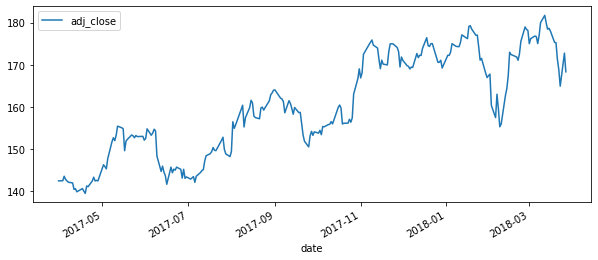

In [47]:
df_APPL.plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='date'>

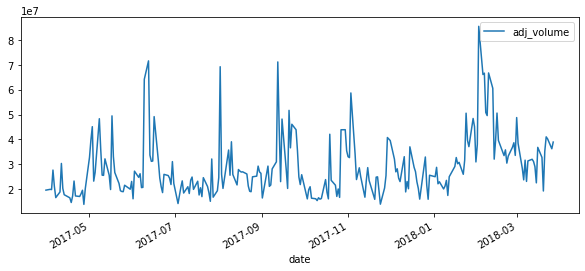

In [48]:
AAPL['adj_volume'].plot(legend=True,figsize=(10,4))

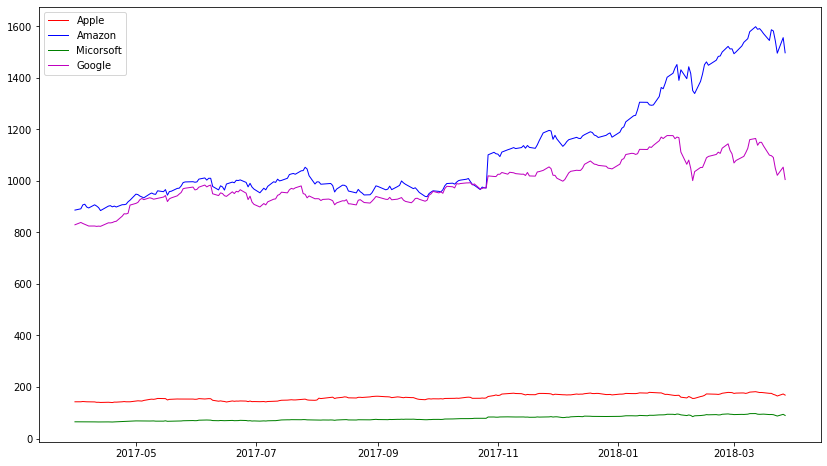

In [49]:
#plot all
plt.figure(figsize=(14,8))
plt.plot(AAPL['adj_close'],'r',label="Apple",linewidth=1)
plt.plot(AMZN['adj_close'],'b',label="Amazon",linewidth=1)
plt.plot(MSFT['adj_close'],'g',label="Micorsoft",linewidth=1)
plt.plot(GOOG['adj_close'],'m',label="Google",linewidth=1)
plt.legend()
plt.show()

<ipython-input-50-6b057dc76540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['Daily_Return'] = AAPL['adj_close'].pct_change()


<AxesSubplot:xlabel='date'>

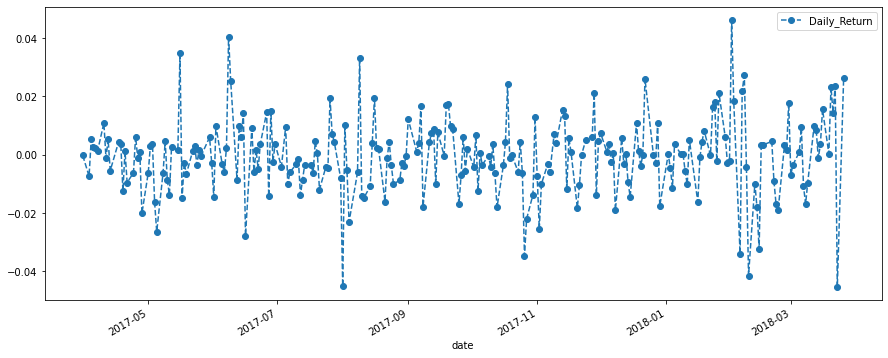

In [50]:
AAPL['Daily_Return'] = AAPL['adj_close'].pct_change()
AAPL['Daily_Return'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o')

In [52]:
closing_price_stock = q.get_table('WIKI/PRICES', ticker = stock_list, 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, ## select the columns you might want or select all 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True).pivot(index="date",columns='ticker', values='adj_close')

In [53]:
closing_price_stock.head()

ticker,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-03-31,142.496334,886.54,829.56,64.816957
2017-04-03,142.536010,891.51,838.55,64.511866
2017-04-04,143.597342,906.83,834.57,64.689015
2017-04-05,142.853418,909.28,831.41,64.521708
2017-04-06,142.496334,898.28,827.88,64.689015


C:\Users\krprl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


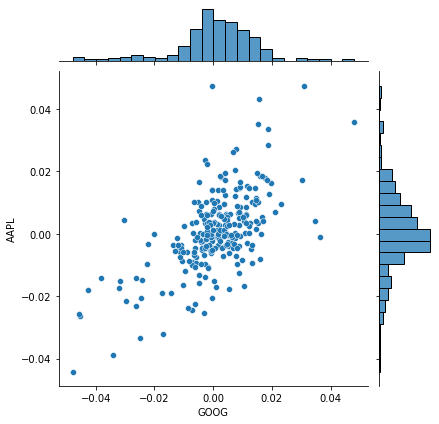

In [54]:
stock_returns = closing_price_stock.pct_change()
sns.jointplot('GOOG','AAPL',stock_returns,kind='scatter')

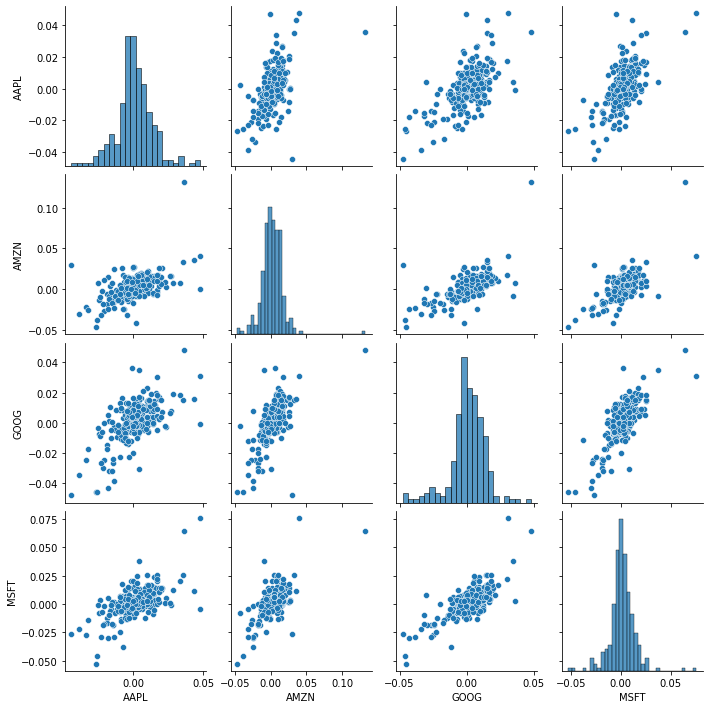

In [55]:
sns.pairplot(stock_returns.dropna())

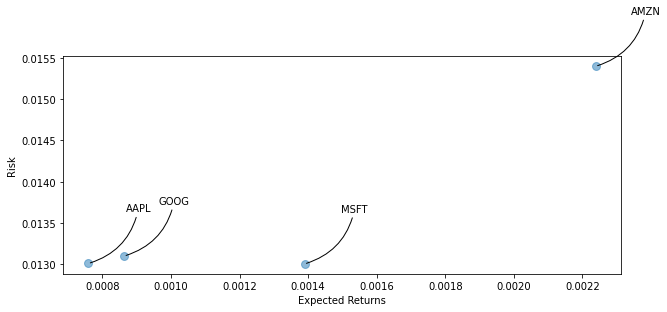

In [56]:
returns = stock_returns.dropna()
area = np.pi*20
plt.figure(figsize=(10,4))
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha='center', va='bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))